#  Project Proposal for COVID-19 Prediction 

### Section-1 : Questions to Answer

#### Question to Answer:  
  
  1. Can we accurately predict COVID-19 diagonsis based on 
  > - Symptoms
  > - Patient information
  2. How accurate prediction will impact the Screening of COVID-19 and the medical treatment,
  3. How the burden from medical system can be lowered through this Model,
  4. Whether this approach would be applicable on other disease 

### Section-2 : Initial Hypothesis  

#### Initial Hypothesis
During our inital hypothesis we assumed that,
  
  1. Certain factor like ***Cough, Fever, Headache, Shortness of breath, Age(60 years above)*** will be significant indicators of COVID-19,
  2. Known contact with confirmed COVID-19 case will also increase the likelihood of testing positive for COVID-19

### Section-3 : Data Analysis Approach

#### Data Analysis Approach:
We will follow these steps:
  
  1. **Data Preprocessing**: Cleaning, handling missing values, and encoding categorical variables.
  2. **Exploratory Data Analysis (EDA)**: Visualize and identify patterns in the data to justify our initial hypotheses.
  3. **Feature Engineering**: Create relevant features, such as a binary indicator for contact with a confirmed COVID-19 case.
  4. **Data Splitting**: Divide the data into training, validation, and test sets.
  5. **Machine Learning Models**: Train and evaluate multiple machine learning models (e.g., Logistic Regression, Random Forest, SVM, Neural Networks).
  6. **Model Evaluation**: Compare model performance using relevant evaluation metrics.
  7. **Cost Functions**: Calculate cost functions to justify the best-performing model.

### Section 4: Machine Learning Approach

#### Machine Learning Approach:
We will employ various machine learning models and techniques to predict COVID-19 diagnosis based on symptoms and patient information. Our approach includes:
  
  1. Data preprocessing and feature engineering to prepare the dataset.
  2. Implementation of multiple machine learning models.
  3. Model evaluation using metrics such as accuracy, precision, recall, and F1-score.
  4. Comparison of models to identify the most accurate and reliable prediction model.
  5. Justification of the selected model using relevant cost functions

In [2]:
pip install pymysql

Note: you may need to restart the kernel to use updated packages.


In [3]:
#Import the libraries
%matplotlib inline
import pandas as pd
import numpy as np
import pymysql
import matplotlib.pyplot as plt
import seaborn as sns

#### Connecting to the database-MySql using PyMysql

In [4]:
#connect with mysql database
conn = pymysql.connect(
        host= 'localhost',
        user = 'root',
        password = '@123Mysql',
        db = 'covid'
)

cur = conn.cursor()

#Executing the query
query = "show tables";
cur.execute(query)

#fetch the output
output = cur.fetchall()
print(output)

(('corona',),)


##### Basic Question which need to be answered 

1.	Find the number of corona patients who faced shortness of breath.
2.	Find the number of negative corona patients who have fever and sore_throat. 
3.	Group the data by month and rank the number of positive cases.
-	Find the female negative corona patients who faced cough and headache.
5.	How many elderly corona patients have faced breathing problems?
6.	Which three symptoms were more common among COVID positive patients?
7.	Which symptom was less common among COVID negative people?
8.	What are the most common symptoms among COVID positive males whose known contact was abroad? 


#### Load the Covid dataset for analysis

In [5]:
#Import the Covid dataset
data = pd.read_csv("corona_tested_006.csv", low_memory= False)

In [6]:
#Read the dataset
data.sample(5)

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
237627,237628,24-04-2020,False,False,False,False,False,negative,NaN,female,Other
143700,143701,13-04-2020,True,True,False,False,False,negative,No,female,Abroad
150936,150937,14-04-2020,False,False,False,False,False,negative,Yes,female,Other
99898,99899,05-04-2020,True,True,True,True,False,positive,Yes,female,Other
72395,72396,01-04-2020,False,False,False,False,False,negative,No,female,Other


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278596 non-null  object
 3   Fever                278596 non-null  object
 4   Sore_throat          278847 non-null  object
 5   Shortness_of_breath  278847 non-null  object
 6   Headache             278847 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         151528 non-null  object
 9   Sex                  259285 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [8]:
#Check total number of null values in each attributes
data.isna().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

In [9]:
#Check number of classes in each attribute
data.nunique()

Ind_ID                 278848
Test_date                  51
Cough_symptoms              2
Fever                       2
Sore_throat                 2
Shortness_of_breath         2
Headache                    2
Corona                      3
Age_60_above                2
Sex                         2
Known_contact               3
dtype: int64

In [13]:
#Check the duplicated rows
data.duplicated().sum()


0

 Value count for Cough_symptoms
 Cough_symptoms
False    84.842568
True     15.157432
Name: proportion, dtype: float64
-----


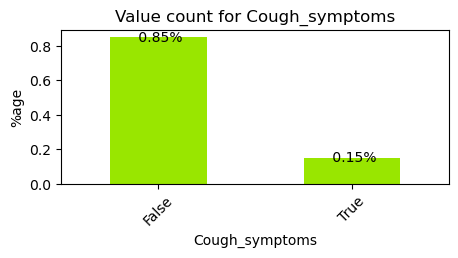

---------------------------------------------------------------------------------
 Value count for Fever
 Fever
False    92.192278
True      7.807722
Name: proportion, dtype: float64
-----


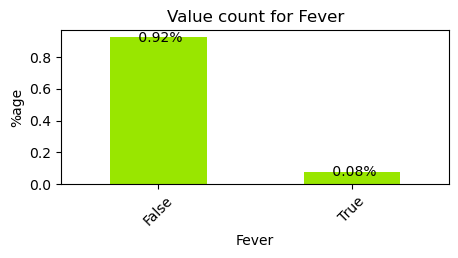

---------------------------------------------------------------------------------
 Value count for Sore_throat
 Sore_throat
False    99.309299
True      0.690701
Name: proportion, dtype: float64
-----


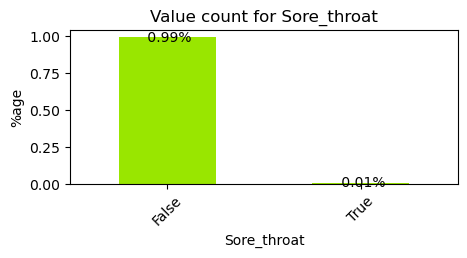

---------------------------------------------------------------------------------
 Value count for Shortness_of_breath
 Shortness_of_breath
False    99.434457
True      0.565543
Name: proportion, dtype: float64
-----


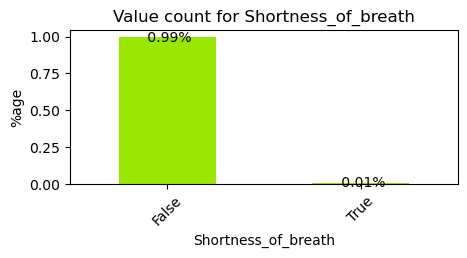

---------------------------------------------------------------------------------
 Value count for Headache
 Headache
False    99.134292
True      0.865708
Name: proportion, dtype: float64
-----


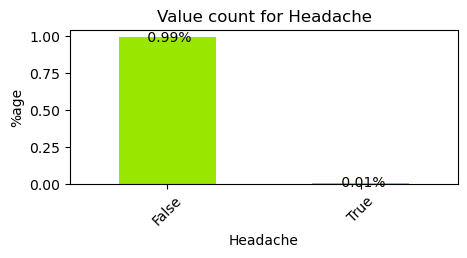

---------------------------------------------------------------------------------
 Value count for Corona
 Corona
negative    93.322168
positive     5.282089
other        1.395742
Name: proportion, dtype: float64
-----


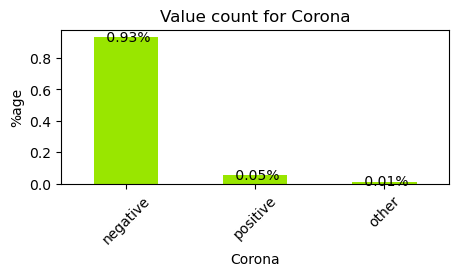

---------------------------------------------------------------------------------
 Value count for Age_60_above
 Age_60_above
No     82.956945
Yes    17.043055
Name: proportion, dtype: float64
-----


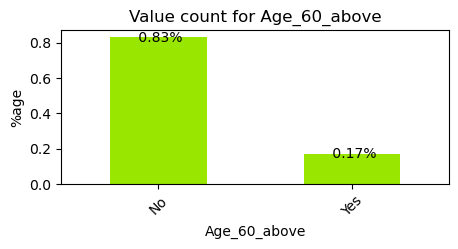

---------------------------------------------------------------------------------
 Value count for Sex
 Sex
female    50.198816
male      49.801184
Name: proportion, dtype: float64
-----


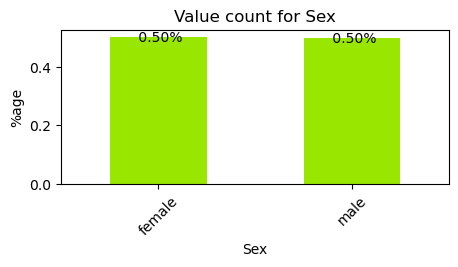

---------------------------------------------------------------------------------
 Value count for Known_contact
 Known_contact
Other                     87.051368
Abroad                     9.133291
Contact with confirmed     3.815340
Name: proportion, dtype: float64
-----


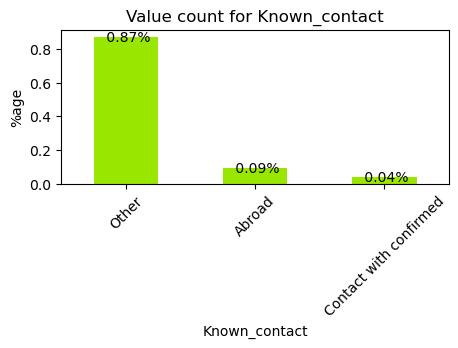

---------------------------------------------------------------------------------


In [9]:
for column in data.columns[2:]:
    value_count = data[column].value_counts(normalize= True)
    print(f" Value count for {column}\n",value_count*100)
    print("-----")
    
    #Create the Bar Graph for each visualiztion
    plt.figure(figsize=(5,2))
    light_green = (0.6, 0.9, 0)
    ax = value_count.plot(kind="bar", color=light_green)
    plt.xlabel(column)
    plt.ylabel("%age")
    plt.title(f"Value count for {column}")
    plt.xticks(rotation=45)
    #Add Data Label in the graph 
    for index,value in enumerate(value_count):
        ax.text(index,value, f"{value: .2f}%", ha="center", va="center" )
    
    plt.show()
    print("---------------------------------------------------------------------------------")

In [10]:
#### Categorical features have inconsistency in terms of 
# value typing like False/FALSE , True/TRUE so change them into single type, we would use replace function 

# for column in data.columns[2:7]:
#     data[column]= data[column].replace({"FALSE":"False", "TRUE":"True"})
    
# #Check the values of columns after changing the word case
# for column in data.columns[2:]:
#     value_count = data[column].value_counts(normalize= True)
#     print(f"Value count for {column}\n", value_count*100)
#     print("-----------------------------")

#### Automate EDA using Pandas(ydata) profiling

In [52]:
# !pip install ydata-profiling

# import ProfileReport from ydata-profiling
import pandas as pd
from ydata_profiling import ProfileReport

profile = ProfileReport(data, title="Profiling Report")
profile.to_file("Covid EDA Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
#Check how many of missing values of Age_60_above have corora or not
data_age60_missing = data[data["Age_60_above"].isnull()]
data_age60_missing.sample(5)

#Check how many of non missing values of Age_60_above have corona or not
filtered_age_60 = data.dropna(subset=['Age_60_above'])
filtered_age_60.sample(5)


,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
44517,44518,28-03-2020,False,False,False,False,False,negative,No,male,Other
104166,104167,05-04-2020,False,False,False,False,False,negative,No,male,Other
41377,41378,27-03-2020,False,False,False,False,False,negative,No,male,Other
113691,113692,07-04-2020,False,True,False,False,False,negative,No,male,Other
5099,5100,17-03-2020,False,False,False,False,False,negative,No,NaN,Other


In [66]:
#Check the %age of people who are corona positive/-ve 
print("Age_60 Missing Values:",data_age60_missing["Corona"].value_counts(normalize=True)*100)
print("\n")
Non_missing_age60 = filtered_age_60["Corona"].value_counts(normalize=True)*100
print("Age_60 non missing values:",Non_missing_age60)

print("------------------------------------------------------------------------")

# Group the Sex and Corona variable in filtered_age60 data to ratio
grouped_non_missing60 = filtered_age_60.groupby(["Age_60_above","Sex","Corona"]).size().reset_index(name="Count")
print(grouped_non_missing60)


Age_60 Missing Values: Corona
negative    96.138863
positive     2.560478
other        1.300660
Name: proportion, dtype: float64


Age_60 non missing values: Corona
negative    90.955467
positive     7.568898
other        1.475635
Name: proportion, dtype: float64
------------------------------------------------------------------------
   Age_60_above   Sex     Corona   Count
0        No      female  negative  50942
1        No      female     other    716
2        No      female  positive   3702
3        No        male  negative  53252
4        No        male     other    783
5        No        male  positive   4892
6       Yes      female  negative  11698
7       Yes      female     other    214
8       Yes      female  positive    927
9       Yes        male  negative   9991
10      Yes        male     other    165
11      Yes        male  positive   1133


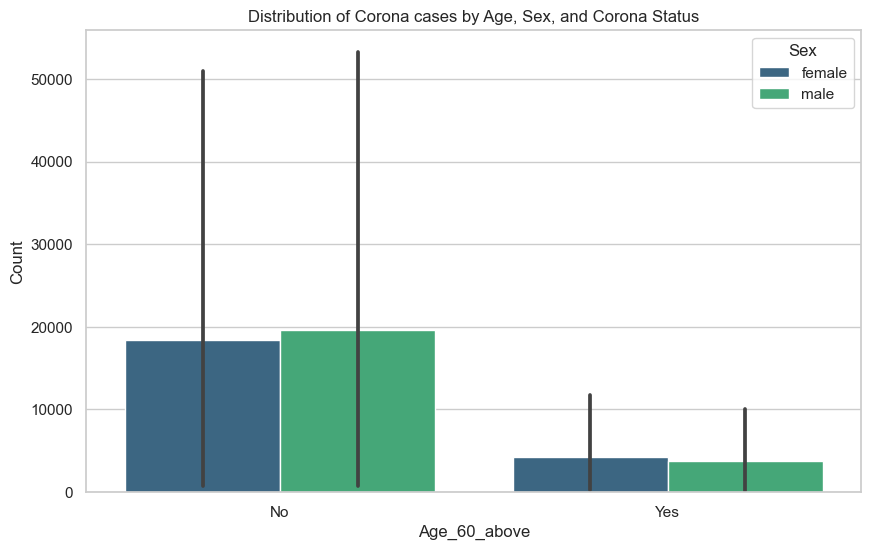

In [68]:
# Use visualization to present the grouped data
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_60_above', y='Count', hue='Sex', data=grouped_non_missing60, palette='viridis')
plt.title('Distribution of Corona cases by Age, Sex, and Corona Status')
plt.show()

##### Preprocessing 

In [16]:
data

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,positive,NaN,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,NaN,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,NaN,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,NaN,male,Other


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278596 non-null  object
 3   Fever                278596 non-null  object
 4   Sore_throat          278847 non-null  object
 5   Shortness_of_breath  278847 non-null  object
 6   Headache             278847 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         151528 non-null  object
 9   Sex                  259285 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [22]:
# Convert Test_date into date time format data type
data['Test_date'] = pd.to_datetime(data['Test_date'], format='%d-%m-%Y')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Ind_ID               278848 non-null  int64         
 1   Test_date            278848 non-null  datetime64[ns]
 2   Cough_symptoms       278596 non-null  object        
 3   Fever                278596 non-null  object        
 4   Sore_throat          278847 non-null  object        
 5   Shortness_of_breath  278847 non-null  object        
 6   Headache             278847 non-null  object        
 7   Corona               278848 non-null  object        
 8   Age_60_above         151528 non-null  object        
 9   Sex                  259285 non-null  object        
 10  Known_contact        278848 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 23.4+ MB


In [25]:
#Impute the missing values by MODE
from sklearn.impute import SimpleImputer

for col in data.columns[2:]:
    mode_val = data[col].mode()[0]
    data[col].fillna(mode_val, inplace=True)
    

In [28]:
#Create the copy of dataset 
data_copy = data.copy()

In [34]:
#Drop the rows where "Corona" column has "other" value
data_copy = data_copy[data_copy["Corona"] != "other"]
data_copy["Corona"].value_counts()

Corona
negative    260227
positive     14729
Name: count, dtype: int64

In [40]:
#Do the Encoding of Cough_symptoms	Fever	Sore_throat	Shortness_of_breath	Headache	
#                   Corona	Age_60_above	Sex	Known_contact

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

#Encode binary categorical variables
label_encoder = LabelEncoder()
binary_cols = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 
               'Headache', 'Corona','Age_60_above', 'Sex','Known_contact']
for col in binary_cols:
    data_copy[col] = label_encoder.fit_transform(data_copy[col])

data_copy

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,2020-03-11,1,0,1,0,0,0,0,0,0
1,2,2020-03-11,0,1,0,0,0,1,0,0,0
2,3,2020-03-11,0,1,0,0,0,1,0,0,0
3,4,2020-03-11,1,0,0,0,0,0,0,0,0
4,5,2020-03-11,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,2020-04-30,0,0,0,0,0,1,0,1,2
278844,278845,2020-04-30,0,0,0,0,0,0,0,0,2
278845,278846,2020-04-30,0,0,0,0,0,0,0,1,2
278846,278847,2020-04-30,0,0,0,0,0,0,0,1,2


In [46]:
f"""
We have data from 11th March 2020 till 30th April 2020. 
Please consider 11th March till 15th April as a training and validation set. From 16th April till 30th April as a test set
"""
# Train-Validation-Test Split
train_val_data = data_copy[data_copy['Test_date'] < '2020-04-16']
test_data = data_copy[data_copy['Test_date'] >= '2020-04-16']

test_data.head()


,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
163189,163190,2020-04-16,1,0,0,0,0,0,0,0,0
163190,163191,2020-04-16,0,0,0,0,0,0,0,0,2
163191,163192,2020-04-16,1,0,0,0,0,0,0,0,0
163192,163193,2020-04-16,0,0,0,0,0,0,0,1,2
163193,163194,2020-04-16,0,0,0,0,0,0,0,1,2


In [54]:
#Drop the Ind_ID	Test_date from train_val_data and test_data

train_val_data = train_val_data.drop(['Ind_ID', 'Test_date'],axis=1)


In [55]:
test_data = test_data.drop(["Ind_ID", "Test_date"], axis=1)
test_data

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
163189,1,0,0,0,0,0,0,0,0
163190,0,0,0,0,0,0,0,0,2
163191,1,0,0,0,0,0,0,0,0
163192,0,0,0,0,0,0,0,1,2
163193,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...
278843,0,0,0,0,0,1,0,1,2
278844,0,0,0,0,0,0,0,0,2
278845,0,0,0,0,0,0,0,1,2
278846,0,0,0,0,0,0,0,1,2


In [57]:
#Split the data into features(X) and target(y)

X= train_val_data.drop("Corona", axis=1)
y= train_val_data["Corona"]

X_test = test_data.drop("Corona", axis=1)
y_test = test_data["Corona"]

In [60]:
#Split the X,y into train and validation for modelling

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.20, random_state=42)

print(len(X_train), len(y_val))

128573 32144


In [62]:
#Prepare the model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

models = {
    'Logistic Regression' : LogisticRegression(),
    'Decision Tree' : DecisionTreeClassifier() ,
    'Random Forest' : RandomForestClassifier(),
    'Gradient Boosting' : GradientBoostingClassifier(),
    'Support Vector Machine' : SVC()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    
    print(f"Accuracy of {model_name} is : {accuracy} \n")
    print(f"Classification Report is : \n{classification_report(y_val, y_pred)}")
    print("--------------------------------------------------------------------")
        


Accuracy of Logistic Regression is : 0.9423531607765058 

Classification Report is : 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     29752
           1       0.85      0.27      0.41      2392

    accuracy                           0.94     32144
   macro avg       0.90      0.64      0.69     32144
weighted avg       0.94      0.94      0.93     32144

--------------------------------------------------------------------
Accuracy of Decision Tree is : 0.9565704330512693 

Classification Report is : 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     29752
           1       0.79      0.57      0.66      2392

    accuracy                           0.96     32144
   macro avg       0.88      0.78      0.82     32144
weighted avg       0.95      0.96      0.95     32144

--------------------------------------------------------------------
Accuracy of Random Forest is : 0.956912643